In [1]:
# Estos dos comandos evitan que haya que hacer reload cada vez que se modifica un paquete
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
df = pd.read_csv('alturas-pesos-train.csv')

# Marginales
### $P(X_1 = 65) $
###  $P(X_2 = 165) $

###  $P(X_3 = Mujer) $
# Conjuntas
### $P(X_1 = 65, X_2 = 165) $
### $P(X_1 = 65, X_2 = 165, X_3 = Mujer) $

# Condicionales
### $P(X_1 = 65| X_2 = 165) $
### $P(X_1 = 65| X_2 = 165, X3 = Mujer) $
### $P(X_1 = 65| X3 = Mujer) $

Comparando el primer ejemplo para probabilidades conjuntas y condicionales, la diferencia entre una y otra es que en el primer caso, considero aquellos casos donde la variable $X_1=65$ y $X_2=165$, **respecto del total de los datos**.
En cambio, en el caso de la condicional, se trata de la probabilidad de $X_1=65$ **respecto sólo de aquellos casos donde $X_2=165$**.

Lo que cambia en definitiva es que la condicional me define respecto de qué parte de la proporción estoy analizando los casos.

In [3]:
# Probabilidad conjunta
conjunta = df.loc[(df['Peso'] == 65) & (df['Altura'] == 165) ]
P_conjunta = len(conjunta)/len(df)
P_conjunta

0.05025

In [4]:
# Probabilidad condicional
num = df[df['Peso'] == 65]
denom = df[df['Altura'] == 165]
P_condicional = len(num)/len(denom)
P_condicional

0.6557734204793029

# Notación

$P(Peso|Genero=hombre) = P(X_1|X_2 = x_2)$

In [5]:
from matplotlib import pyplot as plt
from collections import Counter

## Marginal $P(X_1)$

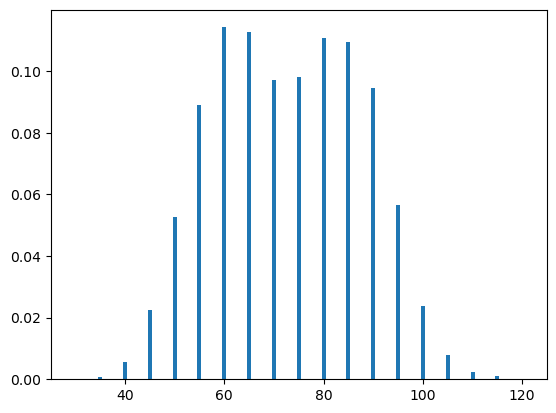

In [6]:
peso =  df['Peso']
peso_frecuencia = dict(Counter(peso))
peso_prob = {pe:c/len(peso) for pe, c in peso_frecuencia.items()}
plt.bar(peso_prob.keys(), peso_prob.values())
plt.show()

# Marginal condicional 
## $P(X_1|X_2=x_2) = P(Peso|Genero=hombre)$

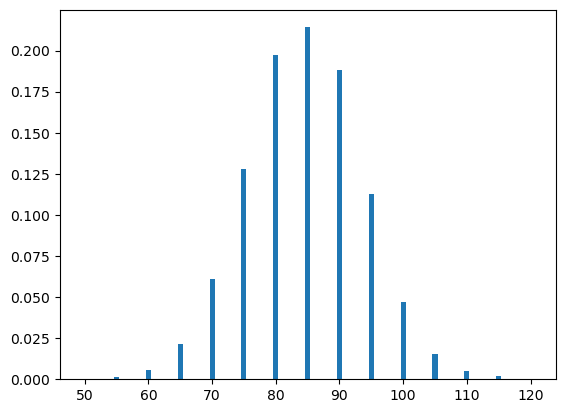

In [7]:
peso_H =  df[df['Genero'] == 'Hombre']['Peso']
peso_H_frecuencia = dict(Counter(peso_H))
peso_prob_H = {pe:c/len(peso_H) for pe, c in peso_H_frecuencia.items()}
plt.bar(peso_prob_H.keys(), peso_prob_H.values())
plt.show()

# Marginal condicional 
## $P(X_1|X_2=x_2) = P(Peso|Genero=mujer)$

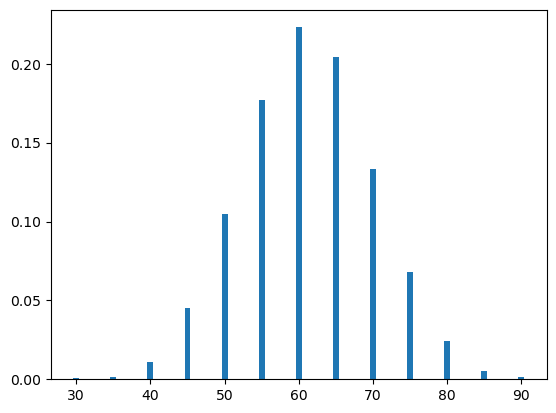

In [8]:
peso_M =  df[df['Genero'] == 'Mujer']['Peso']
peso_M_frecuencia = dict(Counter(peso_M))
peso_prob_M = {pe:c/len(peso_M) for pe, c in peso_M_frecuencia.items()}
plt.bar(peso_prob_M.keys(), peso_prob_M.values())
plt.show()

# Conjunta condicional 

\begin{equation}
P(X_1 = x_1,X_2 = x_2 | Hombre) = \frac{N_{x_1x_2H}}{N_H}
\end{equation}

\begin{equation}
P(X_1 = x_1,X_2 = x_2 | Mujer) = \frac{N_{x_1x_2M}}{N_M}
\end{equation}

## $P(X_1, X_2|X_3=x_3) = P(Peso, Altura|Genero=Hombre)$

Por simplicidad vamos a graficar frecuencias y no probabilidades, pero solo bastaría con normalizar

In [9]:
tuplas_H = []
for line in df[df['Genero'] == 'Hombre'][['Peso', 'Altura']].values:
    tuplas_H.append(tuple(line))
frecuencia_conjunta_H = dict(Counter(tuplas_H))
print(frecuencia_conjunta_H)

{(95, 180): 201, (75, 170): 248, (80, 175): 298, (85, 180): 231, (80, 165): 96, (95, 185): 153, (85, 170): 175, (75, 165): 163, (85, 165): 23, (90, 175): 261, (90, 170): 36, (90, 180): 331, (110, 195): 11, (70, 170): 61, (85, 185): 27, (65, 155): 12, (85, 175): 400, (60, 150): 1, (90, 190): 5, (65, 165): 26, (100, 185): 97, (105, 185): 18, (80, 170): 337, (70, 165): 108, (95, 175): 58, (100, 190): 48, (75, 160): 33, (70, 160): 63, (60, 155): 10, (95, 190): 38, (70, 175): 6, (90, 185): 119, (105, 195): 13, (65, 160): 41, (60, 160): 8, (100, 175): 9, (80, 180): 53, (100, 180): 33, (75, 175): 68, (110, 190): 8, (115, 200): 2, (65, 170): 6, (105, 190): 27, (70, 155): 6, (100, 195): 2, (115, 195): 3, (55, 155): 3, (60, 165): 3, (80, 185): 3, (80, 160): 2, (85, 160): 1, (105, 200): 1, (65, 150): 2, (120, 200): 1, (55, 160): 1, (105, 180): 3, (55, 150): 1, (95, 195): 2, (110, 200): 1, (115, 190): 3, (75, 155): 1, (50, 150): 1}


In [8]:
from helper import plot_joint_3d
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
conjunta_np = plot_joint_3d(frecuencia_conjunta_H, bins_width = 4, az=50, el=-5, ax=ax)

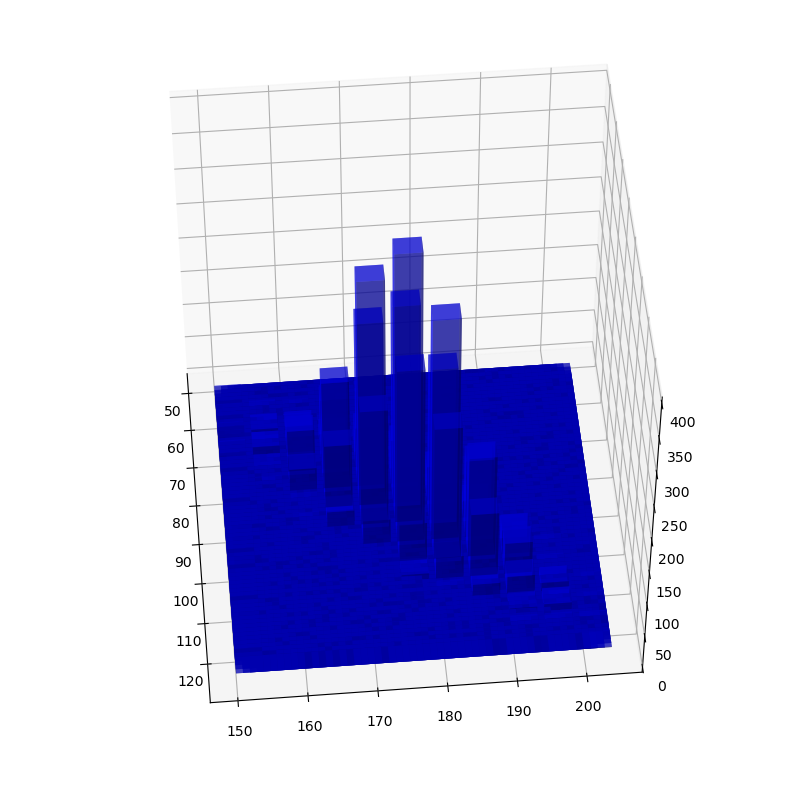

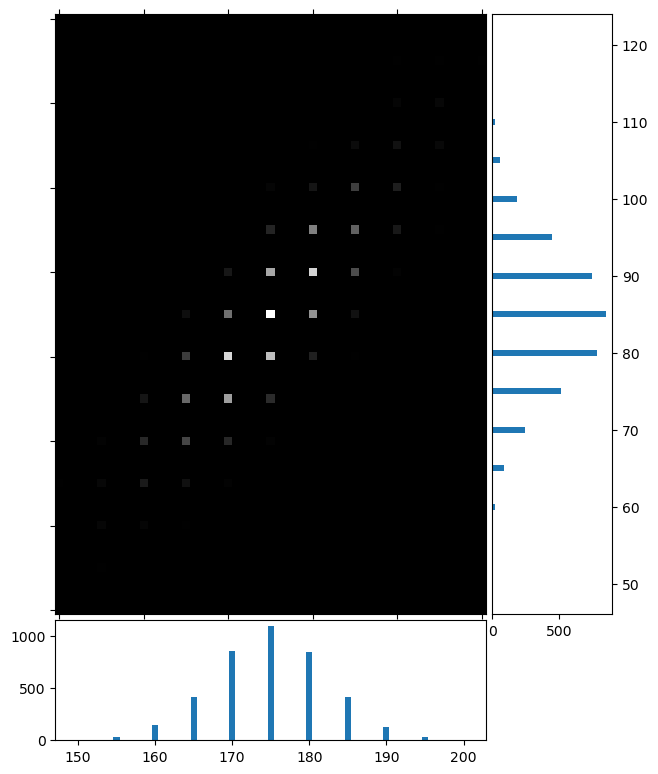

In [9]:
from helper import plot_joint_hists_dicts
conjunta_np, p_min, a_min = plot_joint_hists_dicts(frecuencia_conjunta_H)

# Conjunta condicional 
## $P(X_1, X_2|X_3=x_3) = P(Peso, Altura|Genero=Mujer)$

In [10]:
tuplas_M = []
for line in df[df['Genero'] == 'Mujer'][['Peso', 'Altura']].values:
    tuplas_M.append(tuple(line))
frecuencia_conjunta_M = dict(Counter(tuplas_M))

In [11]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
_ = plot_joint_3d(frecuencia_conjunta_M, bins_width = 4, az=50, el=-5, ax=ax)

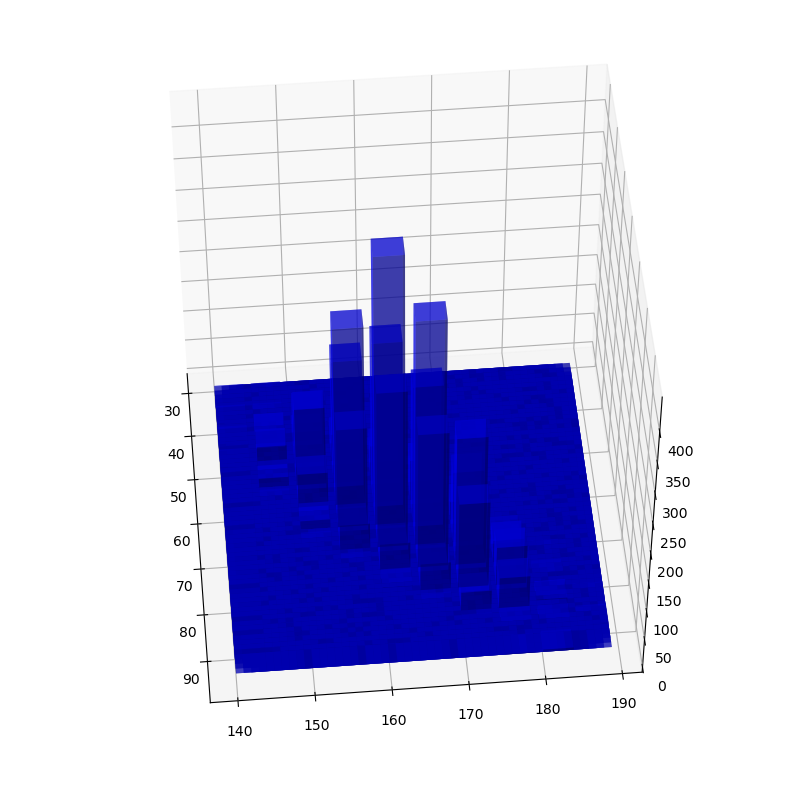

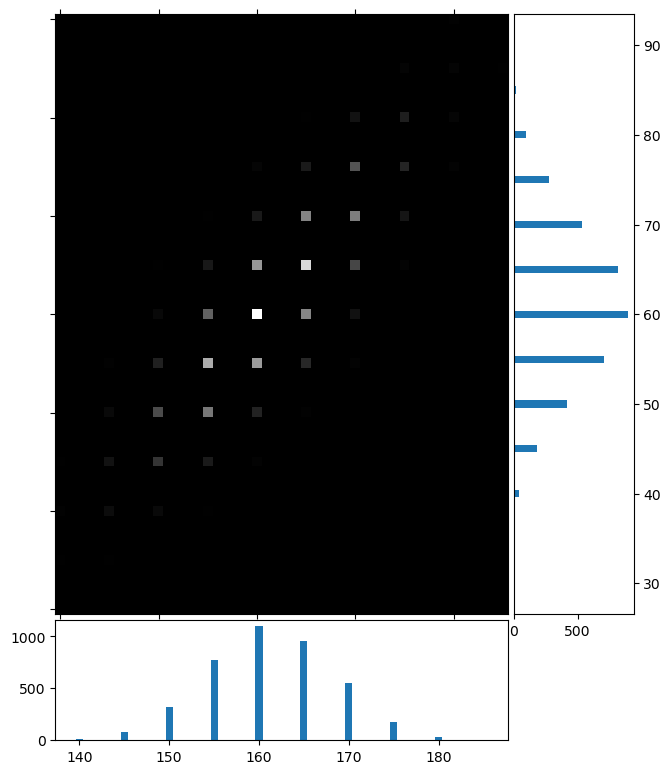

In [12]:
_ = plot_joint_hists_dicts(frecuencia_conjunta_M)

## $P(X_1|X_2<x_2, X_3=x_3) = P(Peso|Altura<160, Genero=Mujer)$

In [10]:
tuplas_c = []
for line in df[(df['Altura']<160) & (df['Genero'] == 'Mujer')][['Peso', 'Altura']].values:
    tuplas_c.append(tuple(line))
frecuencia_conjunta_c = dict(Counter(tuplas_c))
print(frecuencia_conjunta_c)

{(55, 150): 58, (55, 155): 299, (40, 150): 16, (40, 145): 22, (50, 155): 208, (30, 145): 1, (45, 150): 93, (60, 155): 169, (45, 155): 46, (50, 150): 132, (35, 145): 3, (65, 155): 43, (55, 145): 4, (50, 145): 16, (60, 150): 15, (45, 145): 33, (40, 140): 4, (30, 140): 1, (65, 150): 3, (40, 155): 2, (35, 140): 3, (70, 155): 2, (45, 140): 2, (35, 155): 1}


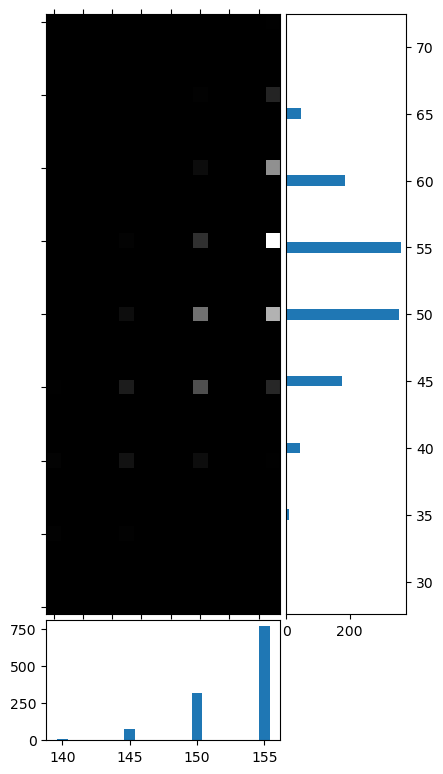

In [14]:
_ = plot_joint_hists_dicts(frecuencia_conjunta_c)